# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### 2.Read dataset

In [9]:
df=pd.read_csv('store_sharing.csv')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### 3.Check missing values and if there are any dublicate rows or not.

In [10]:
df.duplicated().value_counts()

False    17414
dtype: int64

In [11]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weather_code,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0


### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

<AxesSubplot:xlabel='season', ylabel='count'>

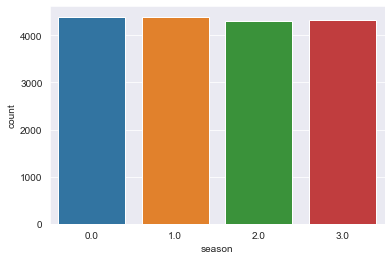

In [14]:
# season
sns.countplot(x='season', data=df)

<AxesSubplot:xlabel='is_holiday', ylabel='count'>

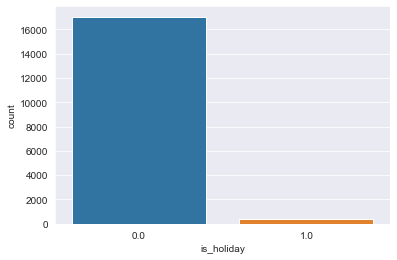

In [15]:
# is_holiday
sns.countplot(x='is_holiday', data=df)

<AxesSubplot:xlabel='is_weekend', ylabel='count'>

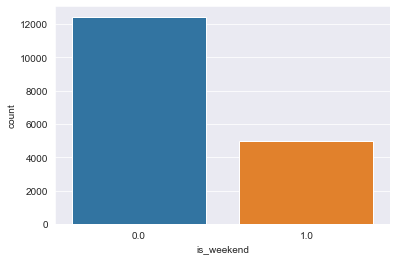

In [16]:
# is_weekend
sns.countplot(x='is_weekend', data=df)

<AxesSubplot:xlabel='weather_code', ylabel='count'>

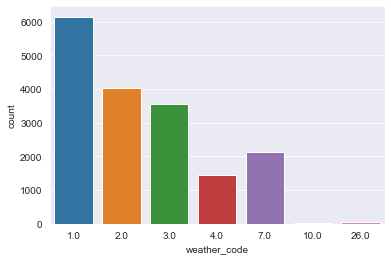

In [17]:
# weather_code
sns.countplot(x='weather_code', data=df)

### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [21]:
df.head(2)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0


In [20]:
df.timestamp = pd.to_datetime(df.timestamp)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [22]:
df.set_index('timestamp', inplace=True)
df.head(2)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0


- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [ ]:
def convert_time(dtobj):
    return dtobj.strftime('%Y-%m')

In [23]:

f = lambda x: x.strftime('%Y-%m')  #strftime.org
df['year_month']=  f(df.index)

df['year'] = df.index.year  # only apply to array
df['month'] = df.index.month
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['hour'] = df.index.hour

In [24]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


### 7.Visualize the correlation with a heatmap

<AxesSubplot:>

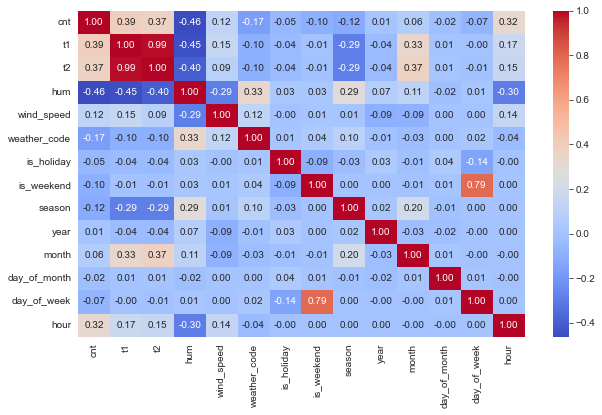

In [27]:
# for all variables 
plt.figure(figsize= (10, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')


In [40]:
pd.DataFrame(df.corr().cnt)
#df.corr().cnt

,cnt
cnt,1.000000
t1,0.388798
t2,0.369035
hum,-0.462901
wind_speed,0.116295
weather_code,-0.166633
is_holiday,-0.051698
is_weekend,-0.096499
season,-0.116180
year,0.010046


<AxesSubplot:>

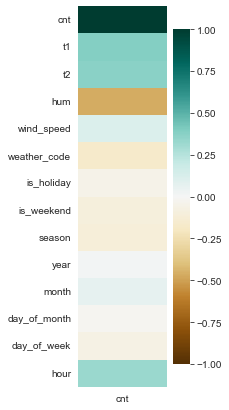

In [37]:
# for the target variable
plt.figure(figsize=(2, 7))
sns.heatmap(pd.DataFrame(df.corr().cnt), vmin=-1, vmax=1, fmt='.2f', cmap='BrBG')


### 8. Visualize the correlation of the target variable and the other features with barplot

<AxesSubplot:>

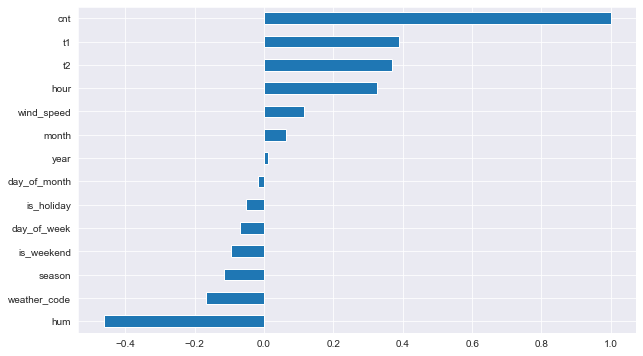

In [41]:
#with pandas
plt.figure(figsize=(10,6))
df.corr()['cnt'].sort_values().plot.barh()

### 9.Plot bike shares over time use lineplot

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

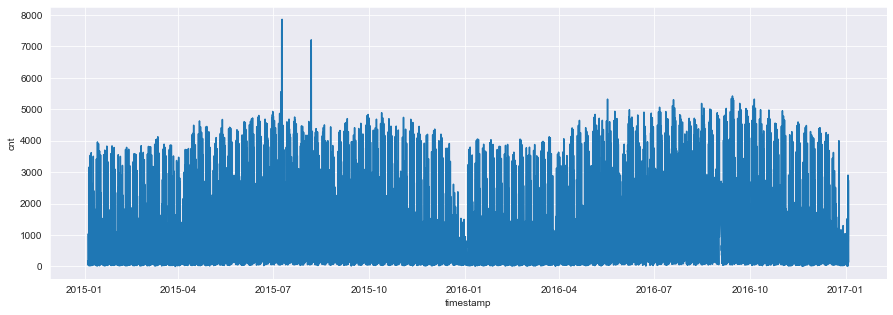

In [43]:
plt.figure(figsize=(15, 5))
sns.lineplot(x=df.index, y='cnt', data=df)

In [44]:
df[df['cnt']<1000].sort_values('cnt')

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-03-29 01:00:00,0,10.5,8.5,77.0,33.0,7.0,0.0,1.0,0.0,2015-03,2015,3,29,6,1
2016-11-21 03:00:00,9,6.0,3.5,93.0,12.0,7.0,0.0,0.0,2.0,2016-11,2016,11,21,0,3
2017-01-03 03:00:00,10,0.0,-4.0,93.0,13.0,1.0,0.0,0.0,3.0,2017-01,2017,1,3,1,3
2016-04-12 03:00:00,11,9.0,7.0,87.0,14.0,7.0,0.0,0.0,0.0,2016-04,2016,4,12,1,3
2016-02-16 03:00:00,12,0.5,-0.5,90.0,5.0,1.0,0.0,0.0,3.0,2016-02,2016,2,16,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-29 21:00:00,999,16.0,16.0,77.0,20.0,2.0,0.0,0.0,1.0,2016-06,2016,6,29,2,21
2015-01-27 12:00:00,999,9.0,6.0,66.0,17.0,2.0,0.0,0.0,3.0,2015-01,2015,1,27,1,12
2016-05-05 21:00:00,999,13.0,13.0,57.0,14.0,1.0,0.0,0.0,0.0,2016-05,2016,5,5,3,21


In [47]:
df[df['cnt']>6000].sort_values('cnt', ascending=False)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-07-09 17:00:00,7860,23.0,22.0,27.0,11.0,1.0,0.0,0.0,1.0,2015-07,2015,7,9,3,17
2015-07-09 08:00:00,7531,14.5,14.5,61.0,19.0,2.0,0.0,0.0,1.0,2015-07,2015,7,9,3,8
2015-08-06 17:00:00,7208,22.5,22.5,55.0,17.5,2.0,0.0,0.0,1.0,2015-08,2015,8,6,3,17
2015-07-09 18:00:00,6913,22.5,21.5,29.0,13.0,1.0,0.0,0.0,1.0,2015-07,2015,7,9,3,18
2015-08-06 08:00:00,6585,19.0,19.0,78.0,12.0,7.0,0.0,0.0,1.0,2015-08,2015,8,6,3,8
2015-08-06 18:00:00,6394,21.5,21.5,58.5,20.0,2.0,0.0,0.0,1.0,2015-08,2015,8,6,3,18
2015-07-09 16:00:00,6033,23.0,22.0,26.0,11.0,1.0,0.0,0.0,1.0,2015-07,2015,7,9,3,16


<AxesSubplot:xlabel='t1', ylabel='cnt'>

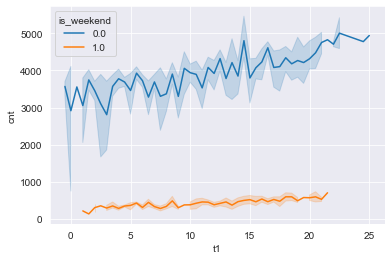

In [48]:
fig, ax = plt.subplots()
sns.lineplot(x='t1', y='cnt', data=df [(df.hour==8)], hue='is_weekend' )

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

In [49]:
df_sum=pd.DataFrame(df.groupby('year_month').cnt.sum())
df_sum.head(3)

,cnt
year_month,
2015-01,546639
2015-02,543594
2015-03,695934


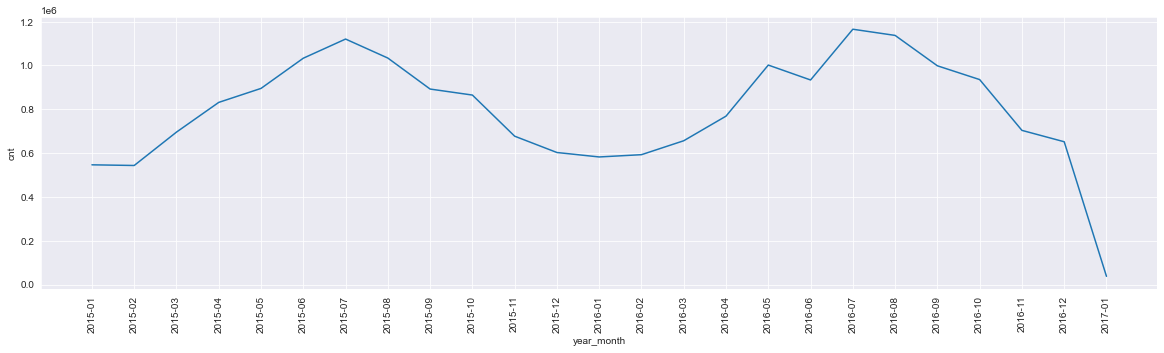

In [50]:
plt.figure(figsize=(20, 5))
sns.lineplot(x='year_month', y='cnt',data=df_sum)
plt.xticks(rotation=90);

In [51]:
df_sum.head()

,cnt
year_month,
2016-09,998619
2016-10,935706
2016-11,703859
2016-12,651908
2017-01,37680


In [53]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


In [52]:
df.tail()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017-01,2017,1,3,1,19
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017-01,2017,1,3,1,20
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017-01,2017,1,3,1,21
2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017-01,2017,1,3,1,22
2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0,2017-01,2017,1,3,1,23


<AxesSubplot:xlabel='month', ylabel='cnt'>

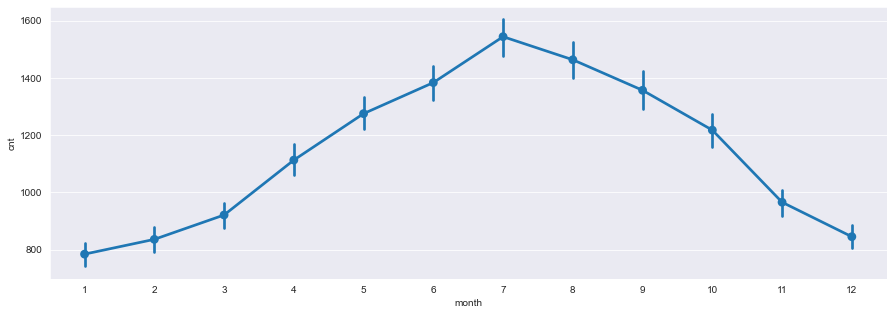

In [54]:
# with pointplot
plt.figure(figsize=(15,5))
sns.pointplot(x='month', y= 'cnt', data=df)

<AxesSubplot:xlabel='month', ylabel='cnt'>

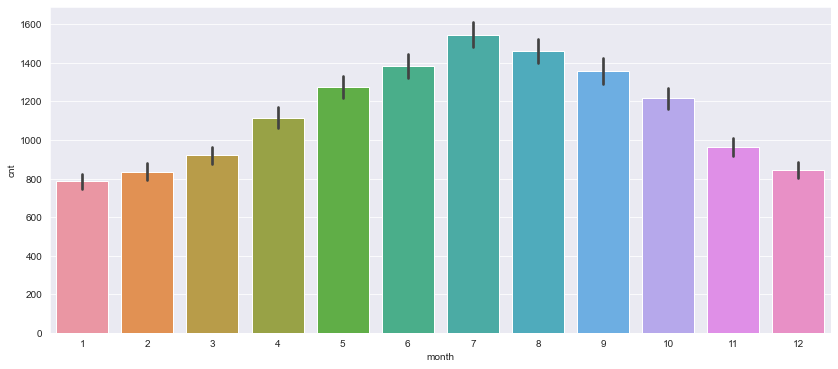

In [55]:
# with barplot
plt.figure(figsize=(14,6))
sns.barplot(x='month', y='cnt', data=df)

### 11.Plot bike shares by hours on (holidays, weekend, season)

In [57]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


<AxesSubplot:xlabel='hour', ylabel='cnt'>

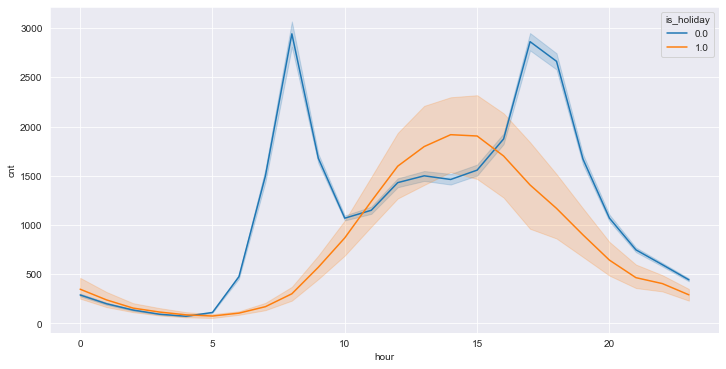

In [58]:
# with lineplot (*whether it is a holiday or not*)
plt.figure(figsize=(12,6))
sns.lineplot(x='hour', y='cnt', hue='is_holiday', data=df)

<AxesSubplot:xlabel='hour', ylabel='cnt'>

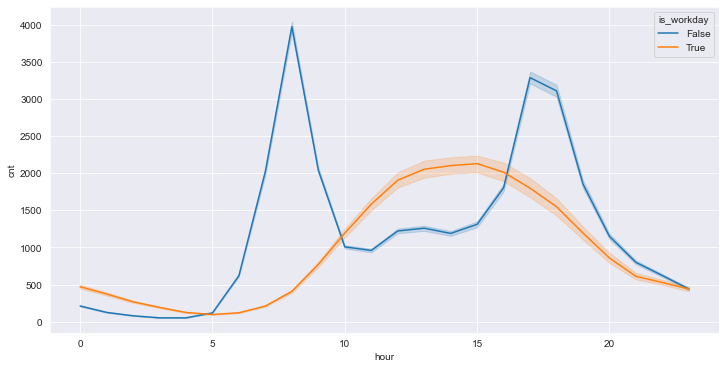

In [59]:
df['is_workday'] = (df['is_weekend']==1) | (df['is_holiday']==1)
plt.figure(figsize=(12,6))
sns.lineplot(x='hour', y='cnt', hue='is_workday', data=df)

<AxesSubplot:xlabel='hour', ylabel='cnt'>

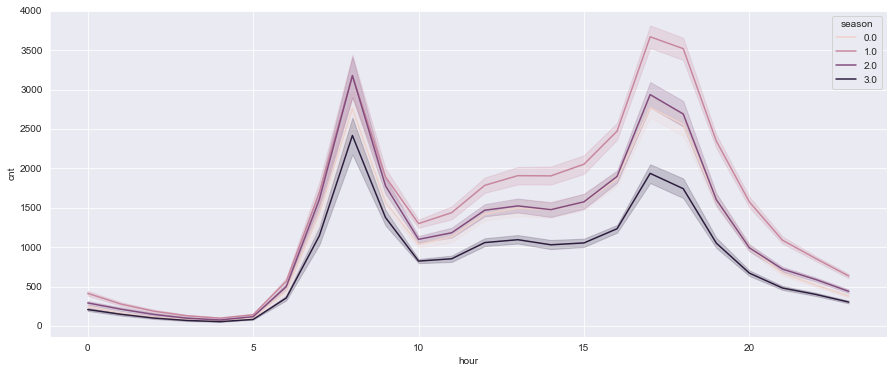

In [60]:
# with lineplot (*You may want to see seasonal breakdowns*)
plt.figure(figsize=(15,6))
sns.lineplot(data=df, x='hour', y='cnt', hue='season')

<AxesSubplot:xlabel='hour', ylabel='cnt'>

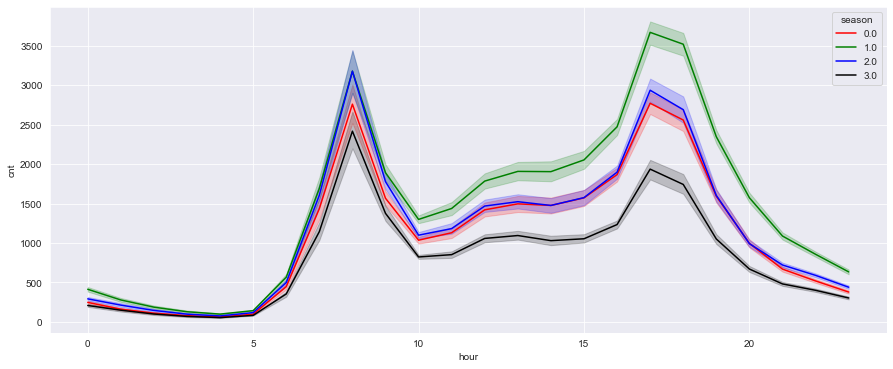

In [61]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df, x='hour', y='cnt', hue='season', palette=['r', 'g', 'b', 'k'])

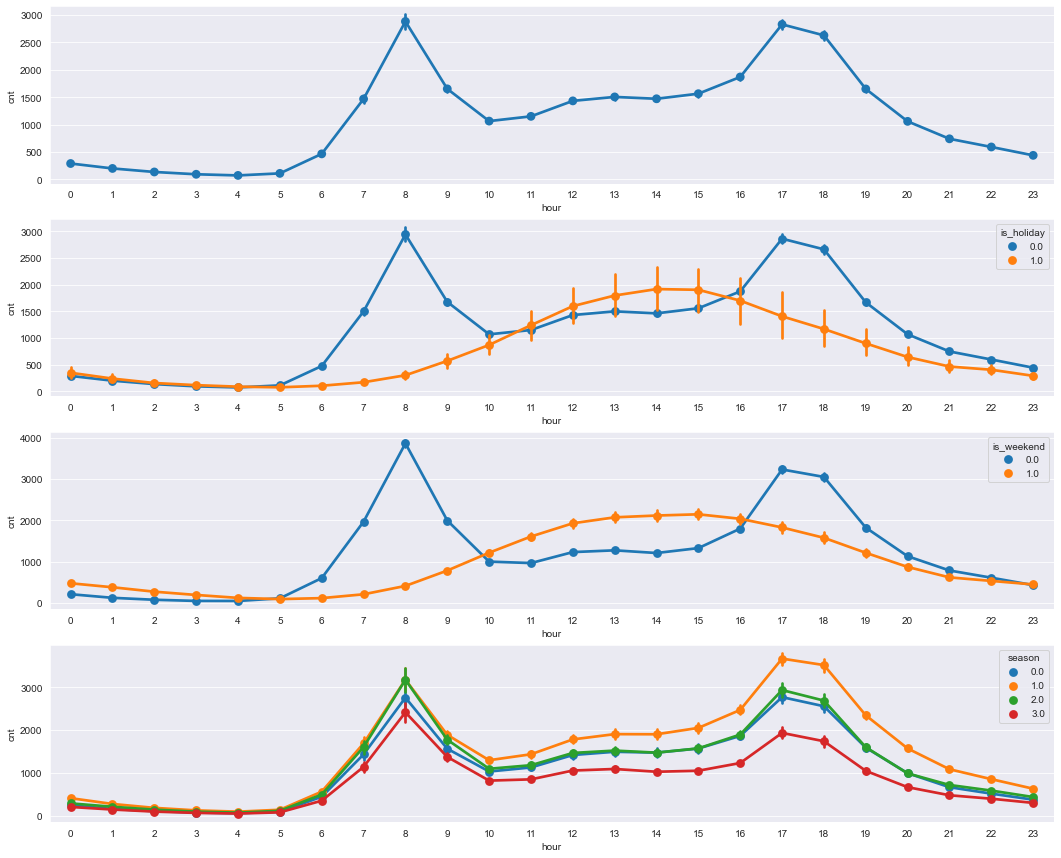

In [62]:
# with pointplot
fig,(ax1, ax2, ax3, ax4)= plt.subplots(nrows=4, figsize=(18,15)  )

sns.pointplot(data=df, x='hour', y='cnt', ax=ax1)
sns.pointplot(data=df, x='hour', y='cnt', hue='is_holiday', ax=ax2)
sns.pointplot(data=df, x='hour', y='cnt', hue='is_weekend', ax=ax3)
sns.pointplot(data=df, x='hour', y='cnt', hue='season', ax=ax4);

### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

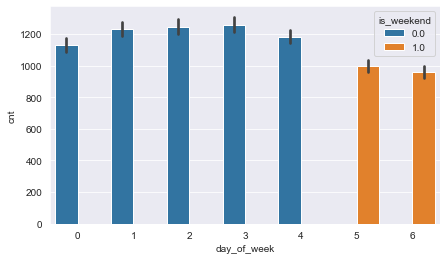

In [63]:
# with barplot
plt.figure(figsize=(7, 4))
sns.barplot(x='day_of_week', y='cnt', data=df, hue='is_weekend')

<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

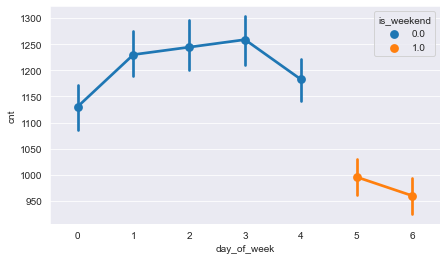

In [66]:
# with pointplot
# with barplot
plt.figure(figsize=(7, 4))
sns.pointplot(x='day_of_week', y='cnt', data=df, hue='is_weekend')

### 13.Plot bike shares by day of month

,cnt
day_of_month,
1,1077.455652
2,1088.117754
3,1127.602837
4,1144.492174
5,1140.772727
6,1211.227431
7,1194.151832
8,1222.696491
9,1261.260870


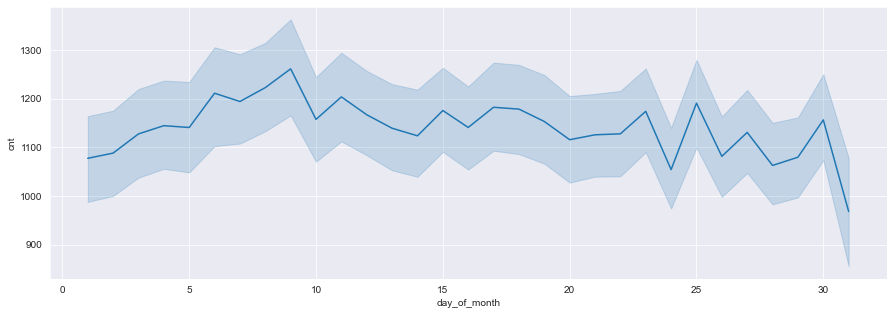

In [67]:
#with lineplot
plt.figure(figsize=(15, 5))
sns.lineplot(x='day_of_month', y='cnt', data=df)
pd.DataFrame(df.groupby('day_of_month').cnt.mean())


### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

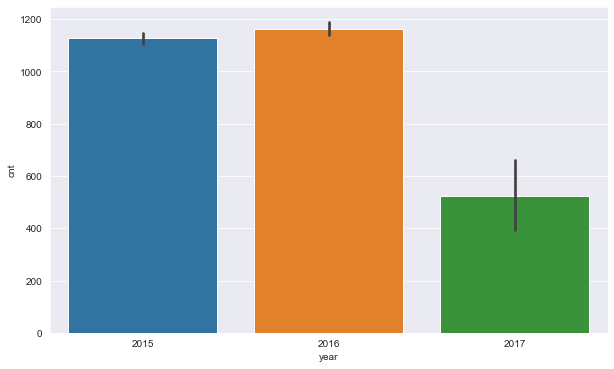

In [68]:
# with barplot
plt.figure(figsize=(10,6))
sns.barplot(x="year",y="cnt",data=df);

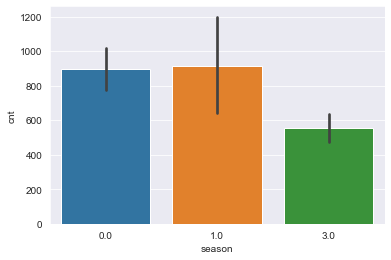

In [71]:
sns.barplot(x="season",y="cnt", data = df[df["is_holiday"]==1]);

In [ ]:
# with barplot

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

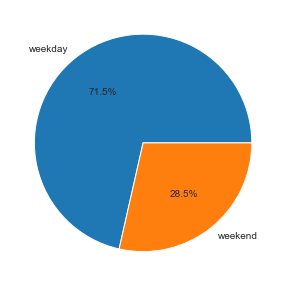

In [72]:
# pie chart
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(x=df.is_weekend.value_counts().values, 
       labels=['weekday','weekend'], 
       autopct='%.1f%%',    
       )
plt.show()

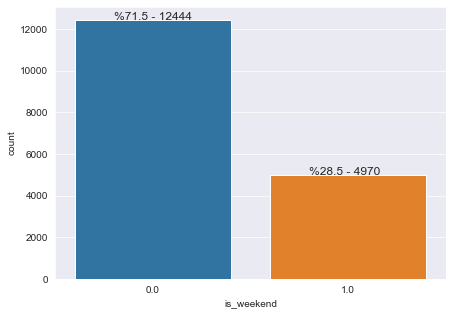

In [73]:
# with countplot

fig, ax = plt.subplots(figsize=(7,5))
ax = sns.countplot(x='is_weekend',data=df)

for bar in ax.patches: 
        ax.annotate(  "%"+str(round(100*bar.get_height()/len(df),1)) +' - '+ str(bar.get_height() ), 
                    (bar.get_x()+0.2 , bar.get_height()+10) ,
                    size=12)

### 16.Plot the distribution of weather code by seasons

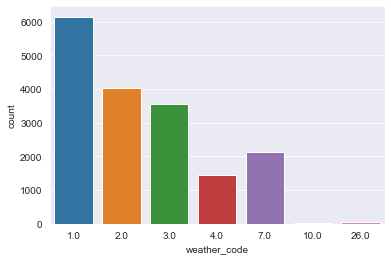

In [74]:
# with countplot
# with seaborn countplot
sns.countplot(x="weather_code",data=df);

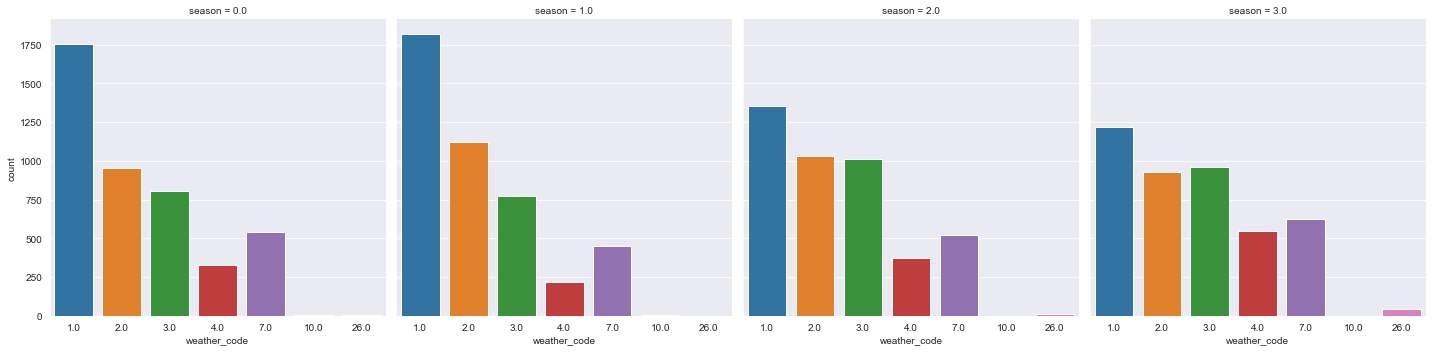

In [75]:
# with catplot
g = sns.catplot(x="weather_code", col="season", data=df, kind='count')

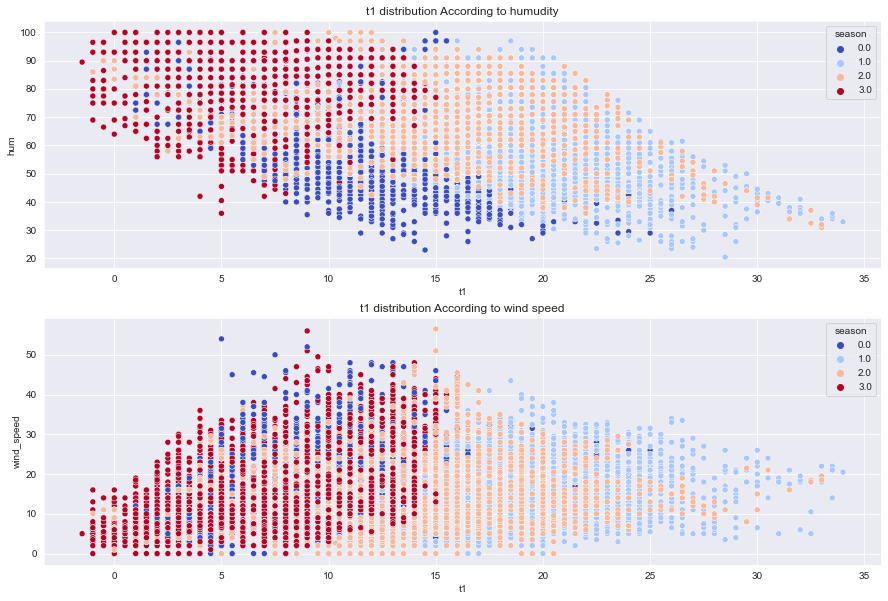

In [76]:
plt.figure(figsize=(15,10))

plt.subplot(211)
plt.title("t1 distribution According to humudity")
sns.scatterplot(x="t1",y="hum",data=df, hue='season',palette="coolwarm")

plt.subplot(212)
plt.title("t1 distribution According to wind speed")
sns.scatterplot(x="t1",y="wind_speed",data=df, hue='season',palette="coolwarm");